# Fractals in the Plastic Field

Alex Bellos recently published an [excellent article in the Guardian](http://www.theguardian.com/science/alexs-adventures-in-numberland/2015/jan/13/golden-ratio-beautiful-new-curve-harriss-spiral) about the "plastic number", or rather about a lovely fractal spiral that [Edmund Harriss](http://www.mathematicians.org.uk/eoh/) discovered based on it.  The article, and an earlier conversation I had with Edmund, inspired me to experiment with the plastic number.  The first result of that experimentation is this fractal tiling:

<img src="plasticFractal-01.png" />

The "plastic number", like the golden ratio, is a number defined as the solution to a very simple polynomial equation.  For the golden ratio, the polyomial is

$$x^2 = x + 1$$

Similarly, the plastic number is the only number $x$ satisfying

$$x^3 = x + 1$$



In [1]:
import math

class PlasticNumber(object):
    def __init__( self, ones=0, rho=0, rho2=0 ):
        self.ones = ones
        self.rho = rho
        self.rho2 = rho2

    def __add__( self, rhs ):  #self and rhs are PlasticNumber objects
        a,b,c = self.ones, self.rho, self.rho2
        if isinstance( rhs, self.__class__ ):
            d,e,f = rhs.ones, rhs.rho, rhs.rho2
            return PlasticNumber( a+d, b+e, c+f )
        elif isinstance( rhs, int ):
            return PlasticNumber( a+rhs, b, c )
        else:
            raise TypeError("unsupported operand type(s) for +: '{}' and '{}'").format(self.__class__, type(other))

    def __sub__( self, rhs ):  #self and rhs are PlasticNumber objects
        a,b,c = self.ones, self.rho, self.rho2
        if isinstance( rhs, self.__class__ ):
            d,e,f = rhs.ones, rhs.rho, rhs.rho2
            return PlasticNumber( a-d, b-e, c-f )
        elif isinstance( rhs, int ):
            return PlasticNumber( a-rhs, b, c )
        else:
            raise TypeError("unsupported operand type(s) for +: '{}' and '{}'").format(self.__class__, type(other))

    def __neg__( self ) :
        return PlasticNumber( -self.ones, -self.rho, -self.rho2 )

    def scale_up( self, power=1 ) :
        if power > 1:
            return self .scale_up() .scale_up( power-1 )
        else:
            return PlasticNumber(
                    self.rho2,
                    self.ones + self.rho2,
                    self.rho )

    def scale_down( self, power=1 ) :
        if power > 1:
            return self .scale_down() .scale_down( power-1 )
        else:
            return PlasticNumber(
                    self.rho - self.ones,
                    self.rho2,
                    self.ones )

    def __mul__( self, rhs ) :
        a,b,c = self.ones, self.rho, self.rho2
        if isinstance( rhs, self.__class__ ):
            d,e,f = rhs.ones, rhs.rho, rhs.rho2
            return PlasticNumber(
                a*d + c*e + b*f,
                b*d + a*e + c*e + b*f + c*f,
                a*f + b*e + c*d + c*f )
        elif isinstance( rhs, int ):
            return PlasticNumber( a*rhs, b*rhs, c*rhs )
        else:
            raise TypeError("unsupported operand type(s) for +: '{}' and '{}'").format(self.__class__, type(other))

    def __str__( self ):
        s = u""
        if self.ones != 0 :
            s = s + u"%d" % ( self.ones )
        if self.rho != 0 :
            if len(s) > 0 :
                s = s + u"+"
            if self.rho != 1 :
                s = s + u"%d" % ( self.rho )
            s = s + u"\u03C1"
        if self.rho2 != 0 :
            if len(s) > 0 :
                s = s + u"+"
            if self.rho2 != 1 :
                s = s + u"%d" % ( self.rho2 )
            s = s + u"\u03C1\u00B2"
        return s.encode('utf-8') 

    rho_real = 1.32471795
    
    def __float__( self ) :
        return self.ones + self.rho_real * ( self.rho + self.rho_real * self.rho2 )

zero = PlasticNumber()
one = PlasticNumber(1)
rho = PlasticNumber(0,1)

print str(rho) + " = " + str(PlasticNumber.rho_real)

def printProd( h1, h2 ) :
    print str(h1) + str(h2) + " = " + str(h1*h2)
    
printProd( rho, rho )
printProd( rho, rho*rho )


ρ = 1.32471795
ρρ = ρ²
ρρ² = 1+ρ


In [2]:
n = one
print str( n )
for i in range(20):
    n = n * rho
    print str( n )


1
ρ
ρ²
1+ρ
ρ+ρ²
1+ρ+ρ²
1+2ρ+ρ²
1+2ρ+2ρ²
2+3ρ+2ρ²
2+4ρ+3ρ²
3+5ρ+4ρ²
4+7ρ+5ρ²
5+9ρ+7ρ²
7+12ρ+9ρ²
9+16ρ+12ρ²
12+21ρ+16ρ²
16+28ρ+21ρ²
21+37ρ+28ρ²
28+49ρ+37ρ²
37+65ρ+49ρ²
49+86ρ+65ρ²


In [3]:
m = rho.scale_up(5)
print( str(m) )
print( str(m-1) )
print( str(m-1+rho) )
print( str(m-1+rho-rho*3) )

1+2ρ+ρ²
2ρ+ρ²
3ρ+ρ²
ρ²


In [4]:

class Vector(object):

    def __init__( self, x, y ):
        self.x = x
        self.y = y

    def __mul__( self, rhs ) :
        return Vector( rhs .__mul__( self.x ), rhs .__mul__( self.y ) )

    def __add__( self, rhs ) :
        return Vector( self.x + rhs.x, self.y + rhs.y )

    def __sub__( self, rhs ) :
        return Vector( self.x - rhs.x, self.y - rhs.y )

    def __neg__( self ) :
        return Vector( -self.x, -self.y )

    def render( self ):
        x = float( self.x )
        y = float( self.y )
        return [ x, y ]

origin = Vector( zero, zero )
lr = Vector( rho, zero )
ur = Vector( rho, one )
ul = Vector( zero, one )

initialRect = ( origin, lr, ur, ul )


Populating the interactive namespace from numpy and matplotlib
1/ρ² = 1+ρ+-1ρ²
ok


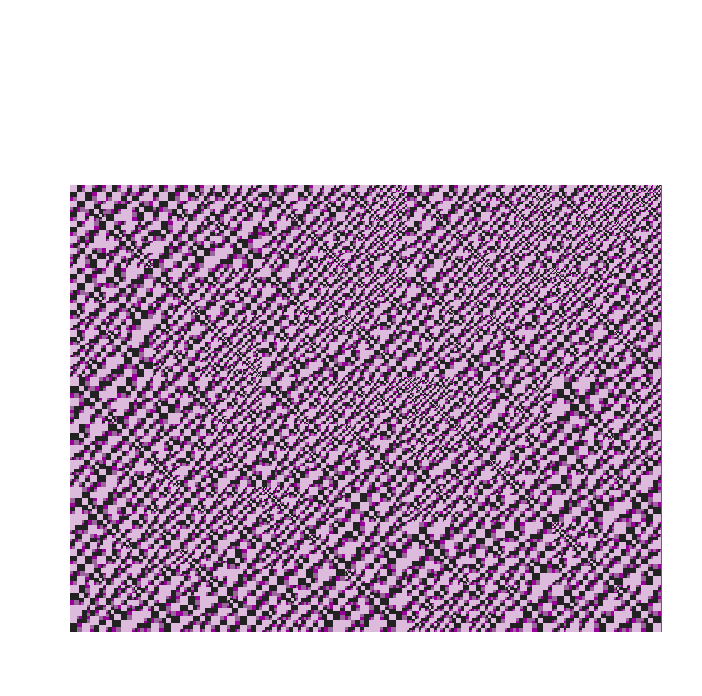

In [40]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
Path = mpath.Path

scaling = one .scale_down(2)
print( "1/" + str(rho*rho) + " = " + str(scaling) )

def part( v1, v2 ):
    return v1 + (v2-v1)*scaling

def line( ax, v1, v2 ):
    verts = []
    codes = [ Path.MOVETO ]
    verts .append( v1 .render() )
    codes .append( Path.LINETO )
    verts .append( v2 .render() )
    path = mpath.Path( verts, codes )
    ax .add_patch( mpatches.PathPatch( path, facecolor='none', edgecolor='#666666' ) )

def rect( ax, vertices, color ):
    v1, v2, v3, v4 = vertices
    verts = []
    codes = [ Path.MOVETO ]
    verts .append( v1 .render() )
    codes .append( Path.LINETO )
    verts .append( v2 .render() )
    codes .append( Path.LINETO )
    verts .append( v3 .render() )
    codes .append( Path.LINETO )
    verts .append( v4 .render() )
    codes .append( Path.LINETO )
    verts .append( v1 .render() )
    path = mpath.Path( verts, codes )
    ax .add_patch( mpatches.PathPatch( path, facecolor=color, edgecolor='none' ) )

def cut1( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v5, v6 )
    v8 = part( v2, v3 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v1, v4, v6, v5 ), depth-1 )
        cut1( ax, ( v7, v8, v3, v6 ), depth-2 )
        cut2( ax, ( v5, v2, v8, v7 ), depth-3 )
    else:
        rect( ax, ( v5, v6, v4, v1 ), '#222222' )
        rect( ax, ( v7, v8, v3, v6 ), '#990099' )
        rect( ax, ( v5, v2, v8, v7 ), '#996699' )

def cut2( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v4, v1 )
    v8 = part( v3, v2 )
    v9 = part( v7, v8 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v9, v6, v3, v8 ), depth-2 )
        cut1( ax, ( v9, v7, v1, v5 ), depth-2 )
        cut2( ax, ( v7, v9, v6, v4 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v9 ), depth-3 )
    else:
        rect( ax, ( v1, v2, v3, v4 ), '#ddbbdd' )
        #rect( ax, ( v1, v5, v9, v7 ), '#003333' )

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
v1, v2, v3, v4 = initialRect
line( ax, v1, v2 )
line( ax, v2, v3 )
line( ax, v3, v4 )
line( ax, v4, v1 )
cut1( ax, initialRect, 14 )
ax.set_xlim(-0.1,1.4)
ax.set_ylim(-0.1,1.4)
ax.axis('off')
#fig.savefig( "plasticFractal-01.png" )

print( "ok" )

In [ ]:

def cut1( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v5, v6 )
    v8 = part( v2, v3 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v1, v4, v6, v5 ), depth-1 )
        cut1( ax, ( v7, v8, v3, v6 ), depth-2 )
        cut2( ax, ( v5, v2, v8, v7 ), depth-3 )
    else:
        rect( ax, ( v5, v6, v4, v1 ), '#009999' )
        rect( ax, ( v7, v8, v3, v6 ), '#007777' )

def cut2( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v4, v1 )
    v8 = part( v3, v2 )
    v9 = part( v7, v8 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v9, v6, v3, v8 ), depth-2 )
        cut1( ax, ( v7, v9, v5, v1 ), depth-2 )
        cut2( ax, ( v7, v9, v6, v4 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v9 ), depth-3 )
    #else:
        #rect( ax, ( v6, v9, v8, v3 ), '#ccbbbb' )
        #rect( ax, ( v1, v5, v9, v7 ), '#003333' )



In [ ]:


def cut1( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v5, v6 )
    v8 = part( v2, v3 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v1, v4, v6, v5 ), depth-1 )
        cut1( ax, ( v7, v8, v3, v6 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v7 ), depth-1 )
    else:
        rect( ax, ( v5, v6, v4, v1 ), '#009999' )
        rect( ax, ( v7, v8, v3, v6 ), '#007777' )

def cut2( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v4, v1 )
    v8 = part( v3, v2 )
    v9 = part( v7, v8 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v9, v6, v3, v8 ), depth-1 )
        #cut1( ax, ( v7, v9, v5, v1 ), depth-1 )
        cut2( ax, ( v7, v9, v6, v4 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v9 ), depth-1 )
    #else:
        #rect( ax, ( v6, v9, v8, v3 ), '#ccbbbb' )
        #rect( ax, ( v1, v5, v9, v7 ), '#003333' )



In [ ]:

def cut1( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v5, v6 )
    v8 = part( v2, v3 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v1, v4, v6, v5 ), depth-1 )
        cut1( ax, ( v7, v8, v3, v6 ), depth-2 )
        cut2( ax, ( v5, v2, v8, v7 ), depth-3 )
    else:
        rect( ax, ( v5, v6, v4, v1 ), '#009999' )
        rect( ax, ( v7, v8, v3, v6 ), '#007777' )

def cut2( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v4, v1 )
    v8 = part( v3, v2 )
    v9 = part( v7, v8 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v9, v6, v3, v8 ), depth-2 )
        cut1( ax, ( v7, v9, v5, v1 ), depth-2 )
        cut2( ax, ( v7, v9, v6, v4 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v9 ), depth-3 )
    #else:
        #rect( ax, ( v6, v9, v8, v3 ), '#ccbbbb' )
        #rect( ax, ( v1, v5, v9, v7 ), '#003333' )



In [ ]:

def cut1( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v5, v6 )
    v8 = part( v2, v3 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v1, v4, v6, v5 ), depth-1 )
        cut1( ax, ( v7, v8, v3, v6 ), depth-2 )
        cut2( ax, ( v5, v2, v8, v7 ), depth-3 )
    else:
        rect( ax, ( v5, v6, v4, v1 ), '#009999' )
        rect( ax, ( v7, v8, v3, v6 ), '#007777' )

def cut2( ax, vertices, depth ):
    v1, v2, v3, v4 = vertices
    v5 = part( v1, v2 )
    v6 = part( v4, v3 )
    v7 = part( v4, v1 )
    v8 = part( v3, v2 )
    v9 = part( v7, v8 )
    #line( ax, v5, v6 )
    #line( ax, v7, v8 )
    if depth > 0:
        cut1( ax, ( v9, v6, v3, v8 ), depth-2 )
        cut1( ax, ( v9, v7, v1, v5 ), depth-2 )
        cut2( ax, ( v7, v9, v6, v4 ), depth-1 )
        cut2( ax, ( v5, v2, v8, v9 ), depth-3 )
    #else:
        #rect( ax, ( v6, v9, v8, v3 ), '#ccbbbb' )
        #rect( ax, ( v1, 